# Give me some Credit

**Data**

**SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse

**RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

**age:** Age of borrower in years

**NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

**DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income

**MonthlyIncome:** Monthly income

**NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

**NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.

**NumberRealEstateLoansOrLines:** Number of mortgage and real estate loans including home equity lines of credit

**NumberOfTime60-89DaysPastDueNotWorse:** Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

**NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credit_df = pd.read_csv("cs-training.csv")
credit_test_df = pd.read_csv("cs-test.csv")

In [4]:
credit_test_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


## Data Exploration

In [3]:
# drop the row id column 
credit_df =credit_df.drop(credit_df.columns[0],axis=1)
credit_test_df =credit_test_df.drop(credit_test_df.columns[0],axis=1)

In [6]:
credit_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [7]:
credit_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [9]:
credit_test_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


### Cómo de desbalanceada está la variable de salida: SeriousDlqin2yrs

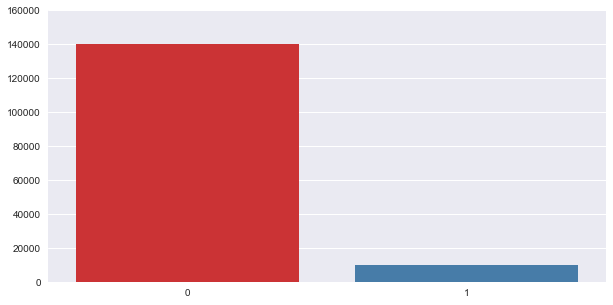

In [10]:
ax = sns.countplot(x = credit_df.SeriousDlqin2yrs ,palette="Set1")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)
plt.show()

### NumberOfTime60-89DaysPastDueNotWorse, NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate : sustituir Outliers por la media

In [11]:
from collections import Counter
Counter(credit_df['NumberOfTime60-89DaysPastDueNotWorse'])

Counter({0: 142396,
         1: 5731,
         2: 1118,
         3: 318,
         4: 105,
         5: 34,
         6: 16,
         7: 9,
         8: 2,
         9: 1,
         11: 1,
         96: 5,
         98: 264})

In [12]:
Counter(credit_df['NumberOfTime30-59DaysPastDueNotWorse'])

Counter({0: 126018,
         1: 16033,
         2: 4598,
         3: 1754,
         4: 747,
         5: 342,
         6: 140,
         7: 54,
         8: 25,
         9: 12,
         10: 4,
         11: 1,
         12: 2,
         13: 1,
         96: 5,
         98: 264})

In [13]:
Counter(credit_df['NumberOfTimes90DaysLate'])

Counter({0: 141662,
         1: 5243,
         2: 1555,
         3: 667,
         4: 291,
         5: 131,
         6: 80,
         7: 38,
         8: 21,
         9: 19,
         10: 8,
         11: 5,
         12: 2,
         13: 4,
         14: 2,
         15: 2,
         17: 1,
         96: 5,
         98: 264})

In [4]:
def removeAndPutMedian(data):
    Media = []
    med = data.median()
    for val in data:
        if ((val == 98) | (val == 96)):
            Media.append(med)
        else:
            Media.append(val)
            
    return Media

In [5]:
credit_df['NumberOfTime60-89DaysPastDueNotWorse'] = removeAndPutMedian(credit_df['NumberOfTime60-89DaysPastDueNotWorse'])
credit_df['NumberOfTime30-59DaysPastDueNotWorse']=removeAndPutMedian(credit_df['NumberOfTime30-59DaysPastDueNotWorse'])
credit_df['NumberOfTimes90DaysLate']=removeAndPutMedian(credit_df['NumberOfTimes90DaysLate'])

In [6]:
credit_test_df['NumberOfTime60-89DaysPastDueNotWorse'] = removeAndPutMedian(credit_test_df['NumberOfTime60-89DaysPastDueNotWorse'])
credit_test_df['NumberOfTime30-59DaysPastDueNotWorse']=removeAndPutMedian(credit_test_df['NumberOfTime30-59DaysPastDueNotWorse'])
credit_test_df['NumberOfTimes90DaysLate']=removeAndPutMedian(credit_test_df['NumberOfTimes90DaysLate'])

### RevolvingUtilizationOfUnsecuredLines: eliminar Outliers

In [20]:
#desviación tipica muy alta
credit_df['RevolvingUtilizationOfUnsecuredLines'].max()

50708.0

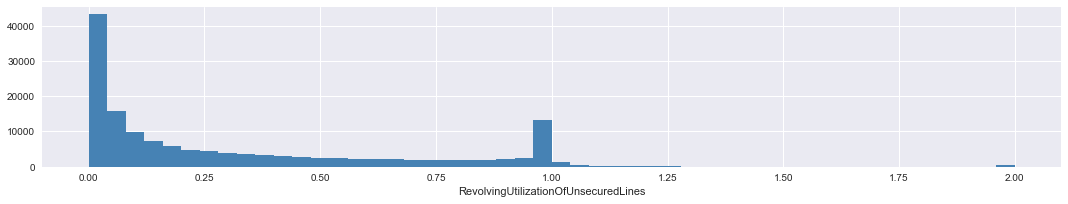

In [33]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df, margin_titles=True,aspect=5)
g.map(plt.hist, "RevolvingUtilizationOfUnsecuredLines", color="steelblue", bins=50, lw=0)
plt.show()

In [17]:
credit_df['RevolvingUtilizationOfUnsecuredLines'][credit_df['RevolvingUtilizationOfUnsecuredLines']>2].count()

371

In [7]:
Revol= []
for val in credit_df['RevolvingUtilizationOfUnsecuredLines']:
    if val <= 2:
        Revol.append(val)
    else:
        Revol.append(2)
credit_df['RevolvingUtilizationOfUnsecuredLines']=Revol

In [8]:
Revol= []
for val in credit_test_df['RevolvingUtilizationOfUnsecuredLines']:
    if val <= 2:
        Revol.append(val)
    else:
        Revol.append(2)
credit_test_df['RevolvingUtilizationOfUnsecuredLines']=Revol

### age: eliminamos un outlier en 0

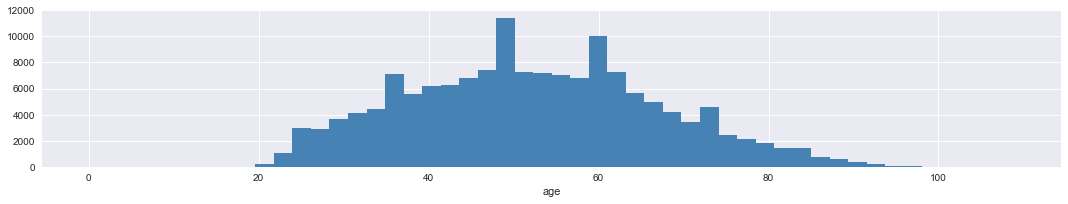

In [22]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df, margin_titles=True,aspect=5)
g.map(plt.hist, "age", color="steelblue", bins=50, lw=0)
plt.show()

In [24]:
credit_df['age'][credit_df['age']<20]

65695    0
Name: age, dtype: int64

In [35]:
credit_df['age'].max()

109

In [9]:
age= []
for val in credit_df['age']:
    if val <20:
        age.append(20)
    else:
        age.append(val)
credit_df['age']=age

### DebtRatio

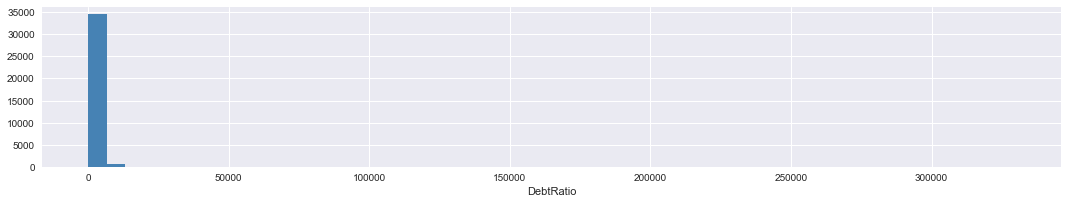

In [27]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df[credit_df["DebtRatio"]>1], margin_titles=True,aspect=5)
g.map(plt.hist, "DebtRatio", color="steelblue", bins=50, lw=0)
plt.show()

### NumberOfOpenCreditLinesAndLoans

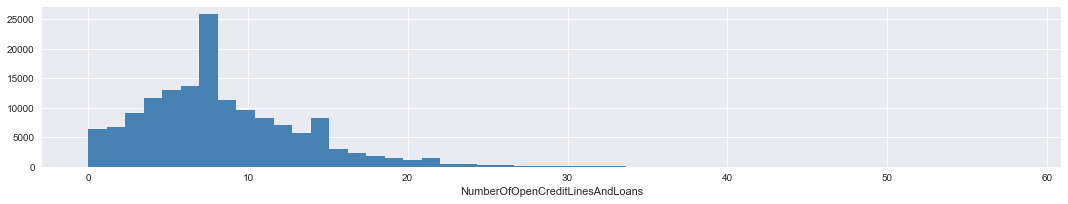

In [28]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df, margin_titles=True,aspect=5)
g.map(plt.hist, "NumberOfOpenCreditLinesAndLoans", color="steelblue", bins=50, lw=0)
plt.show()

### NumberRealEstateLoansOrLines

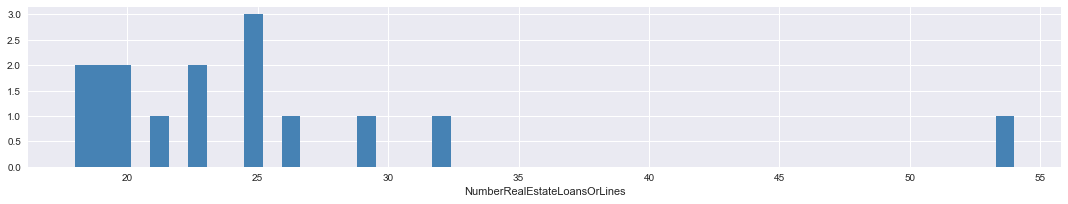

In [29]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df[credit_df["NumberRealEstateLoansOrLines"]>17], margin_titles=True,aspect=5)
g.map(plt.hist, "NumberRealEstateLoansOrLines", color="steelblue", bins=50, lw=0)
plt.show()

### NumberOfDependents

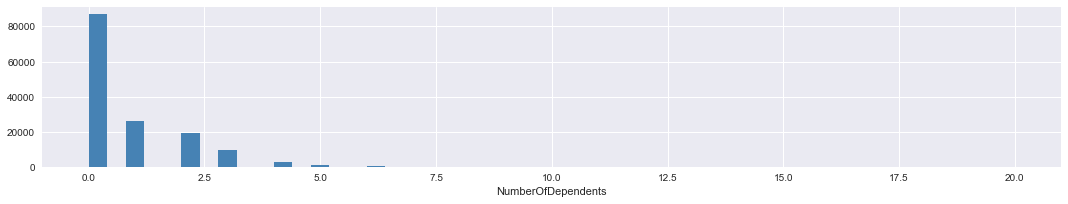

In [36]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df, margin_titles=True,aspect=5)
g.map(plt.hist, "NumberOfDependents", color="steelblue", bins=50, lw=0)
plt.show()

In [10]:
num= []
for val in credit_df["NumberOfDependents"]:
    if val <10:
        num.append(val)
    else:
        num.append(10)
credit_df["NumberOfDependents"]=num

In [11]:
num= []
for val in credit_test_df["NumberOfDependents"]:
    if val <10:
        num.append(val)
    else:
        num.append(10)
credit_test_df["NumberOfDependents"]=num

In [12]:
#Sustituimos los NAs por la media
credit_df["NumberOfDependents"].fillna(credit_df["NumberOfDependents"].median(), inplace=True)
credit_test_df["NumberOfDependents"].fillna(credit_test_df["NumberOfDependents"].median(), inplace=True)

### MonthlyIncome

Construimos un modelo LinearRegression para predecir los valores NAs

In [13]:
train = credit_df[credit_df.MonthlyIncome.isnull() == False]
test = credit_df[credit_df.MonthlyIncome.isnull() == True]

In [14]:
train.shape, test.shape

((120269, 11), (29731, 11))

In [15]:
X_train = train.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)
y_train = train.MonthlyIncome
X_test = test.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)

In [16]:
from sklearn.linear_model import LinearRegression
lmMod = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)

In [17]:
pred = lmMod.predict(X_test)

In [18]:
predNoZero = []
for val in pred:
    if val >= 0:
        predNoZero.append(val)
    else:
        predNoZero.append(0.)
        

testFull = credit_df[credit_df.MonthlyIncome.isnull() == True]
testFull['MonthlyIncome'] = predNoZero

C:\Users\anaalbcru\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
monNew = []
for index in credit_df.index:
    if credit_df.MonthlyIncome[index].is_integer() == True:
        monNew.append(credit_df.MonthlyIncome[index])
    else:
        monNew.append(testFull.MonthlyIncome[index])
        
credit_df.MonthlyIncome = monNew

In [20]:
credit_df.MonthlyIncome.describe()

count    1.500000e+05
mean     6.408573e+03
std      1.295408e+04
min      0.000000e+00
25%      3.488000e+03
50%      5.139816e+03
75%      7.865000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [21]:
#Realizamos el mismo proceso para el conjunto de test
train = credit_test_df[credit_test_df.MonthlyIncome.isnull() == False]
test = credit_test_df[credit_test_df.MonthlyIncome.isnull() == True]

In [22]:
train.shape, test.shape

((81400, 11), (20103, 11))

In [23]:
X_train = train.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)
y_train = train.MonthlyIncome
X_test = test.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)

In [24]:
lmMod = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)
pred = lmMod.predict(X_test)

In [25]:
predNoZero = []
for val in pred:
    if val >= 0:
        predNoZero.append(val)
    else:
        predNoZero.append(0.)
        

testFull = credit_test_df[credit_test_df.MonthlyIncome.isnull() == True]
testFull['MonthlyIncome'] = predNoZero

C:\Users\anaalbcru\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
monNew = []
for index in credit_test_df.index:
    if credit_test_df.MonthlyIncome[index].is_integer() == True:
        monNew.append(credit_test_df.MonthlyIncome[index])
    else:
        monNew.append(testFull.MonthlyIncome[index])
        
credit_test_df.MonthlyIncome = monNew

In [27]:
credit_test_df.MonthlyIncome.describe()

count    1.015030e+05
mean     6.859664e+03
std      3.271479e+04
min      0.000000e+00
25%      3.750000e+03
50%      5.750000e+03
75%      8.047333e+03
max      7.727000e+06
Name: MonthlyIncome, dtype: float64

## Dividimos en conjuntos de Entrenamiento, validación y test

In [71]:
from sklearn.model_selection import train_test_split
X_train = credit_df.drop("SeriousDlqin2yrs",axis=1)
Y_train = credit_df["SeriousDlqin2yrs"]
X_test  = credit_test_df.drop("SeriousDlqin2yrs",axis=1)
#el 15% del conjunto de entrenamiento será para validar
X_train,X_dev,Y_train,Y_dev = train_test_split(X_train, Y_train, test_size=0.15)

In [75]:
len(X_test)

101503

### Funciones Auxiliares 

In [62]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

def plot_roc(Y, Y_scores):
    fpr, tpr, thresholds = roc_curve(Y, Y_scores, pos_label = 1)
    plt.figure(1, figsize=(6,6))
    plt.xlabel('Tasa falsos positivos')
    plt.ylabel('Tasa verdaderos positivos')
    plt.title('Curva ROC')
    plt.plot(fpr, tpr)
    plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    plt.show()
    
def eval_model(pipe, X_train, Y_train, X_test, Y_test):
    pipe.fit(X_train, Y_train)
    predicted_test = pipe.predict(X_test)
    scores_test = pipe.predict_proba(X_test)[:,1] #necesitamos la probabilidad para dibujar el area bajo la curva
    predicted_train = pipe.predict(X_train)
    scores_train = pipe.predict_proba(X_train)[:,1]
    print()
    print("Evaluación en el conjunto de entrenamiento:")
    print(classification_report(Y_train, predicted_train))
    print('Roc_auc_score:', roc_auc_score(Y_train, scores_train))
    print()
    print("Evaluación en el conjunto de validación:")
    print(classification_report(Y_test, predicted_test))
    print('Roc_auc_score:', roc_auc_score(Y_test, scores_test))
    plot_roc(Y_test, scores_test)
    return (scores_test)

# Modelos

### 1. Random Forest


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    118970
          1       1.00      0.99      0.99      8530

avg / total       1.00      1.00      1.00    127500

Roc_auc_score: 0.999955732779

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     21004
          1       0.53      0.18      0.27      1496

avg / total       0.92      0.94      0.92     22500

Roc_auc_score: 0.82249507224


C:\Users\anaalbcru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


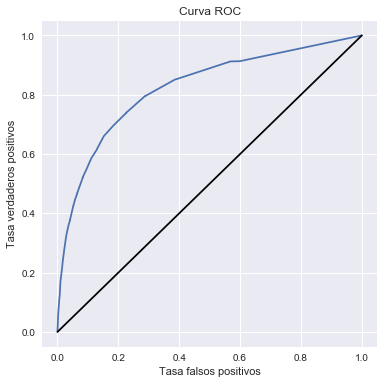

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

rmfc = RandomForestClassifier(n_estimators=50, max_features = 'sqrt')

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('for', rmfc)
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

### 1.1 Grid Search para el Random Forest

In [31]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('for',RandomForestClassifier())
])

param_range = [30, 40, 50, 60]

param_grid = {'for__n_estimators': param_range}

param_grid = [{'for__n_estimators': param_range,'for__max_features': ['auto']},
              {'for__n_estimators': param_range,'for__max_features': ['sqrt']}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='accuracy')

gs = gs.fit(X_train, Y_train)
print(gs.best_score_)
print(gs.best_params_)

0.934650980392
{'for__max_features': 'auto', 'for__n_estimators': 40}


## 2. Naive Bayes


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       0.96      0.94      0.95    118984
          1       0.36      0.49      0.41      8516

avg / total       0.92      0.91      0.91    127500

Roc_auc_score: 0.841993363602

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.96      0.94      0.95     20990
          1       0.36      0.50      0.42      1510

avg / total       0.92      0.91      0.91     22500

Roc_auc_score: 0.846979719135


C:\Users\anaalbcru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


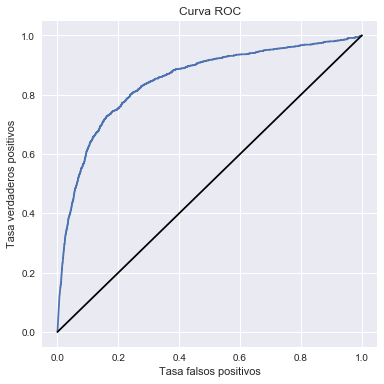

In [78]:
from sklearn.naive_bayes import GaussianNB

gnv = GaussianNB()
pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('nb',gnv)
])

eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

## 3. kNN


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97    118970
          1       0.69      0.31      0.43      8530

avg / total       0.94      0.94      0.93    127500

Roc_auc_score: 0.951387094444

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.95      0.98      0.96     21004
          1       0.42      0.20      0.27      1496

avg / total       0.91      0.93      0.92     22500

Roc_auc_score: 0.739249437591


C:\Users\anaalbcru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


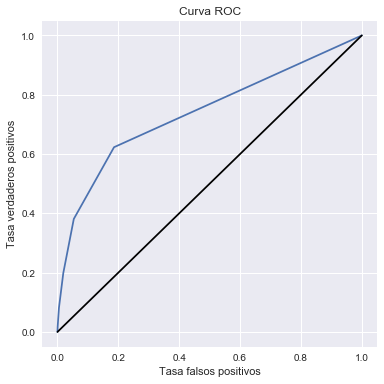

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('knn', knn)
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

## 4. SVC

In [ ]:
from sklearn.svm import SVC

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('svc',SVC(C = 0.5))
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

## 5. Gradient Boosting Regression


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97    118968
          1       0.64      0.20      0.31      8532

avg / total       0.92      0.94      0.92    127500

Roc_auc_score: 0.871272385101

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     21006
          1       0.60      0.18      0.28      1494

avg / total       0.92      0.94      0.92     22500

Roc_auc_score: 0.861571058107


C:\Users\anaalbcru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


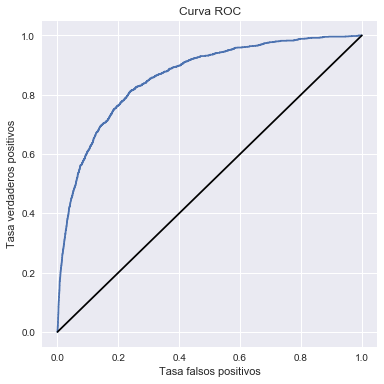

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('gbMod', gbMod)
])
scores_test = eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

In [64]:
print(scores_test)

[ 0.01871435  0.51022025  0.0097872  ...,  0.02325766  0.44503928
  0.03311617]


In [70]:
len(credit_test_df.index.values)

101503

In [79]:
pred_score = gbMod.predict_proba(X_test)[:,1]

In [80]:
len(pred_score)

101503

In [84]:
#Prepare submission file
my_submission = pd.DataFrame({'Id': credit_test_df.index.values+1, 'Probability': pred_score})
my_submission.to_csv('submission.csv', index=False)

In [83]:
credit_test_df.index.values + 1

array([     1,      2,      3, ..., 101501, 101502, 101503], dtype=int64)

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_dev, estimator.predict(X_dev))
print("MSE: %.4f" % mse)
plot_roc(X_dev, )

NameError: name 'estimator' is not defined

## 6. AdaBoostRegressor


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97    118970
          1       0.55      0.21      0.30      8530

avg / total       0.92      0.94      0.92    127500

Roc_auc_score: 0.865452761742

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97     21004
          1       0.53      0.20      0.29      1496

avg / total       0.92      0.93      0.92     22500

Roc_auc_score: 0.855423419476


C:\Users\anaalbcru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


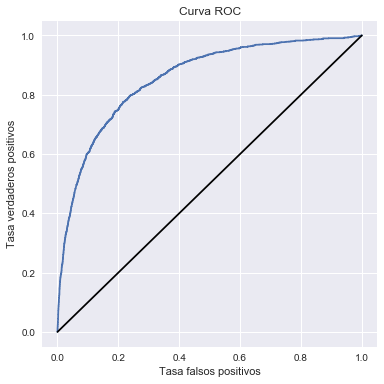

In [37]:
from sklearn.ensemble import AdaBoostClassifier

adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('adaMod', adaMod)
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

# Cross-Validation

In [84]:
def cvDictGen(functions, scr, X_train=X_train, y_train=Y_train, cv=3, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [85]:
from sklearn.model_selection import cross_val_score
cvDictGen(functions=[rmfc, gnv, knn, gbMod, adaMod], scr='roc_auc')

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.7s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   43.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   46.3s finished


{'AdaBoostClassifier': [0.85570248916504854, 0.0023373784121283195],
 'GaussianNB': [0.82939851543942122, 0.0069275869532327986],
 'GradientBoostingClassifier': [0.86215365871308569, 0.0019698600191380253],
 'KNeighborsClassifier': [0.57222416779216856, 0.005552659629054736],
 'RandomForestClassifier': [0.83042831862547517, 0.0040793959579247877]}

# Grid Search

## Confusion Matrix

In [83]:
def plot_confusion_matrix(y_true, y_pred, title = 'Confusion matrix', cmap=plt.cm.Blues):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print ('Classification Report:\n')
    print (classification_report(y_test, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    def plot_confusion_matrix_plot(cm, title = 'Confusion matrix', cmap=plt.cm.Blues):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(y_test.unique()))
        plt.xticks(tick_marks, rotation=45)
        plt.yticks(tick_marks)
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    
    print ('\n Confusion matrix, without normalization: \n')
    print (cm)
    plot_confusion_matrix_plot(cm=cm)
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('\n Normalized confusion matrix \n')
    print(cm_normalized)
    plt.figure()
    plot_confusion_matrix_plot(cm_normalized, title='Normalized confusion matrix')

def makePredThresh(fittedCls, thr = 0.5, X_test=X_test):
    prob = fittedCls.predict_proba(X_test)[: ,1]
    final = []
    for p in prob:
        if p >= thr:
            final.append(1)
        else:
            final.append(0)
    
    return final

In [87]:
pred = makePredThresh(gbMod, thr=0.0645)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [88]:
plot_confusion_matrix(y_test, pred)

NameError: name 'y_test' is not defined